In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

## Generate the dataset

In [2]:
x, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

## Split the dataset into training and testing

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Initialize and train the decision tree classifier

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## Make prediction on the test set

In [5]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

## Calculate the confusion matrix

In [6]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[119,  27],
       [ 14, 140]], dtype=int64)

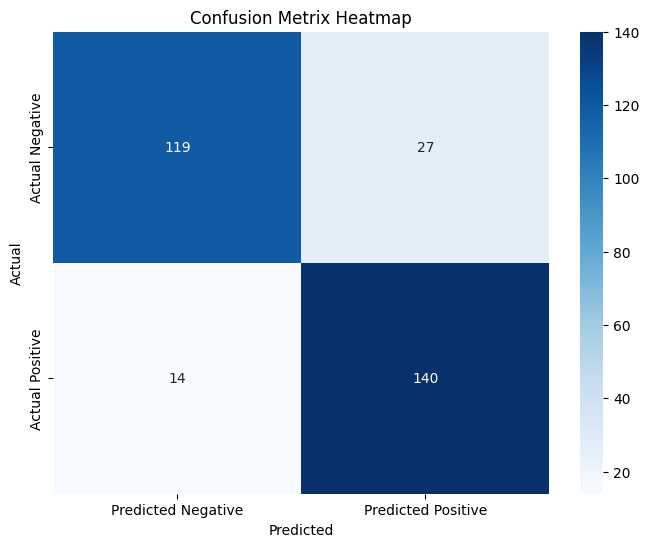

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Metrix Heatmap")
plt.show()

## Split the confusion metrix into TP, FP, FN, TN

In [10]:
tn, fp, fn, tp = cm.ravel()

In [15]:
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (FN): {tn}")

True Positives (TP): 140
False Positives (FP): 27
False Negatives (FN): 14
True Negatives (FN): 119


## Calculate various performance metrics

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [17]:
print("Accuray: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuray:  0.8633333333333333
Precision:  0.8383233532934131
Recall:  0.9090909090909091
F1 Score:  0.8722741433021806


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       146
           1       0.84      0.91      0.87       154

    accuracy                           0.86       300
   macro avg       0.87      0.86      0.86       300
weighted avg       0.87      0.86      0.86       300



## Display ROC-Curve

In [19]:
from sklearn.metrics import RocCurveDisplay

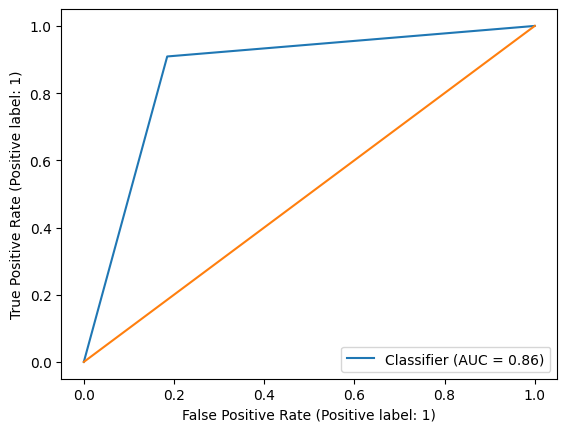

In [21]:
RocCurveDisplay.from_predictions(y_test, clf.predict(x_test))
plt.plot([0,1], [0,1])
plt.show()